In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Models were not imported at once, mostly added later

In [99]:
df = pd.read_csv("/Users/Susmi/Desktop/Python/Part_2/522275_959195_bundle_archive/train_plane.csv")
df_test=pd.read_csv("/Users/Susmi/Desktop/Python/Part_2/522275_959195_bundle_archive/test.csv")

df.head()

,sl,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [101]:
def missing_percent(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/ len(df) * 100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total', '%'])
missing_percent(df)

,Total,%
Arrival Delay in Minutes,310,0.3
satisfaction,0,0.0
Gate location,0,0.0
id,0,0.0
Gender,0,0.0
Customer Type,0,0.0
Age,0,0.0
Type of Travel,0,0.0
Class,0,0.0
Flight Distance,0,0.0


There are some missing values in Arrival Delay in minutes, which will be filled accordingly

In [79]:
#transform the categorical variables to numerical ones
def gender_bool(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def customer_type_change(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def travel_type_change(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def class_change(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def change_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df=df.drop(['sl','id'],axis=1)
    df['Gender'] = df['Gender'].apply(gender_bool)
    df['Customer Type'] = df['Customer Type'].apply(customer_type_change)
    df['Type of Travel'] = df['Type of Travel'].apply(travel_type_change)
    df['Class'] = df['Class'].apply(class_change)
    df['satisfaction'] = df['satisfaction'].apply(change_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

df = process_data(df)
df_test=process_data(df_test)

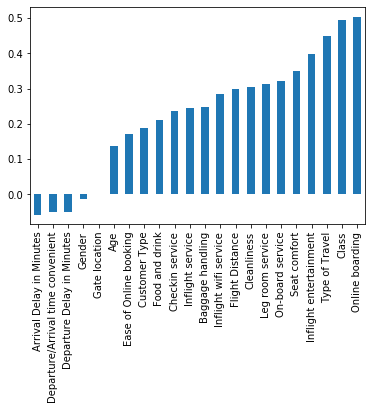

In [80]:
#showing the correlations in ascending order
df.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

In [81]:
#creating array of variables
x=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class','Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
y='satisfaction'

In [82]:
#dividing into dependendt and independent variables
X_train=df[x]
y_train=df[y]
X_test=df_test[x]
y_test=df_test[y]

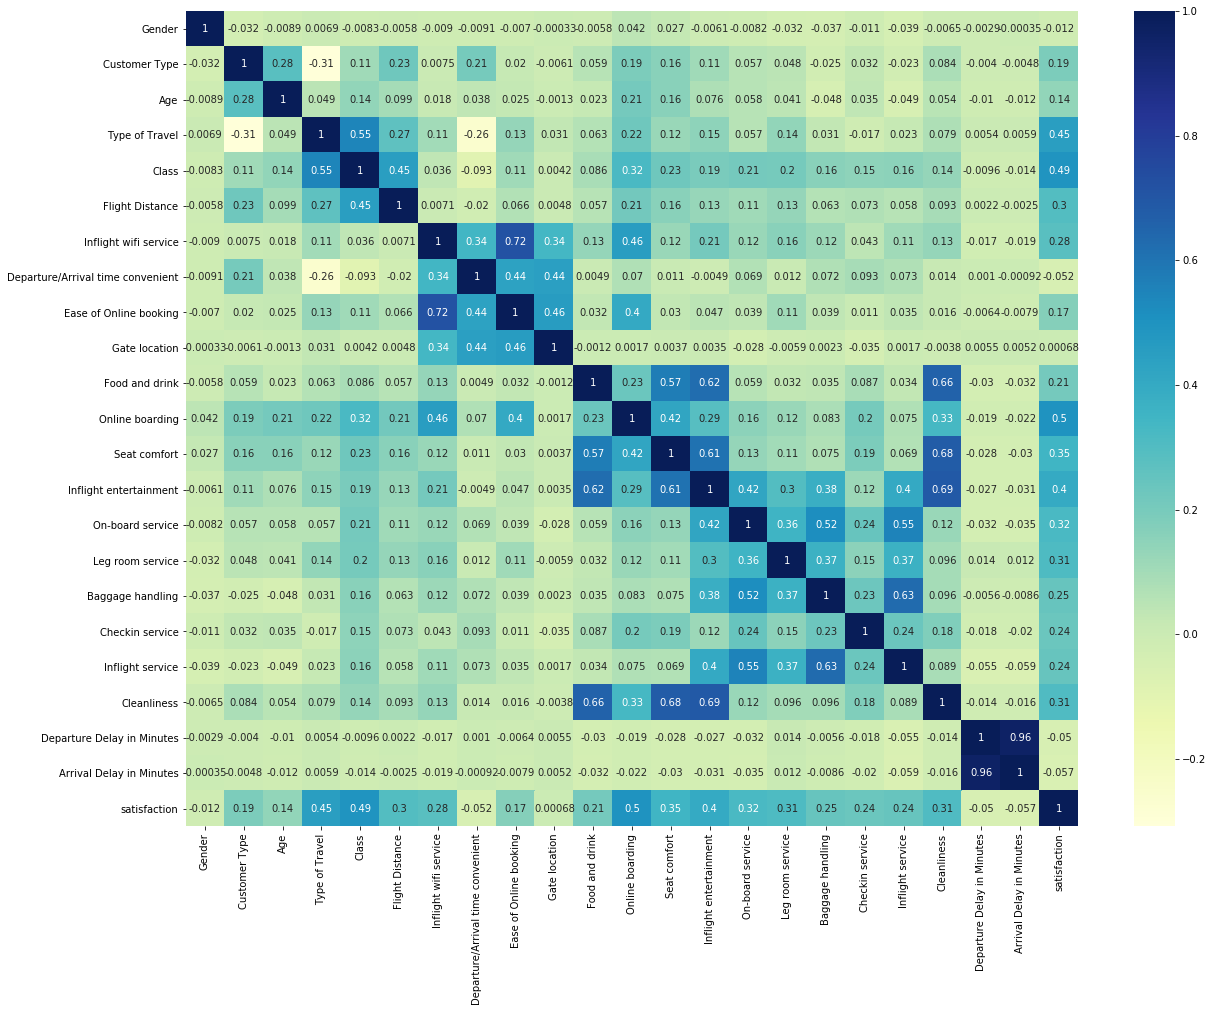

In [83]:
#correlation matrix
plt.figure(figsize=(20,15))
sn.heatmap(df.corr(),annot = True,cmap='YlGnBu')

We drop the variables whose correlations were less than or equal to 0.25. This might drop the overall accuracy, but will save memory use considerably.

In [84]:
#dropping variables
X_train_modified=X_train.drop(['Gender','Age','Departure/Arrival time convenient','Departure Delay in Minutes','Arrival Delay in Minutes','Gate location','Customer Type','Ease of Online booking','Food and drink','Baggage handling','Checkin service','Inflight service'], axis=1)

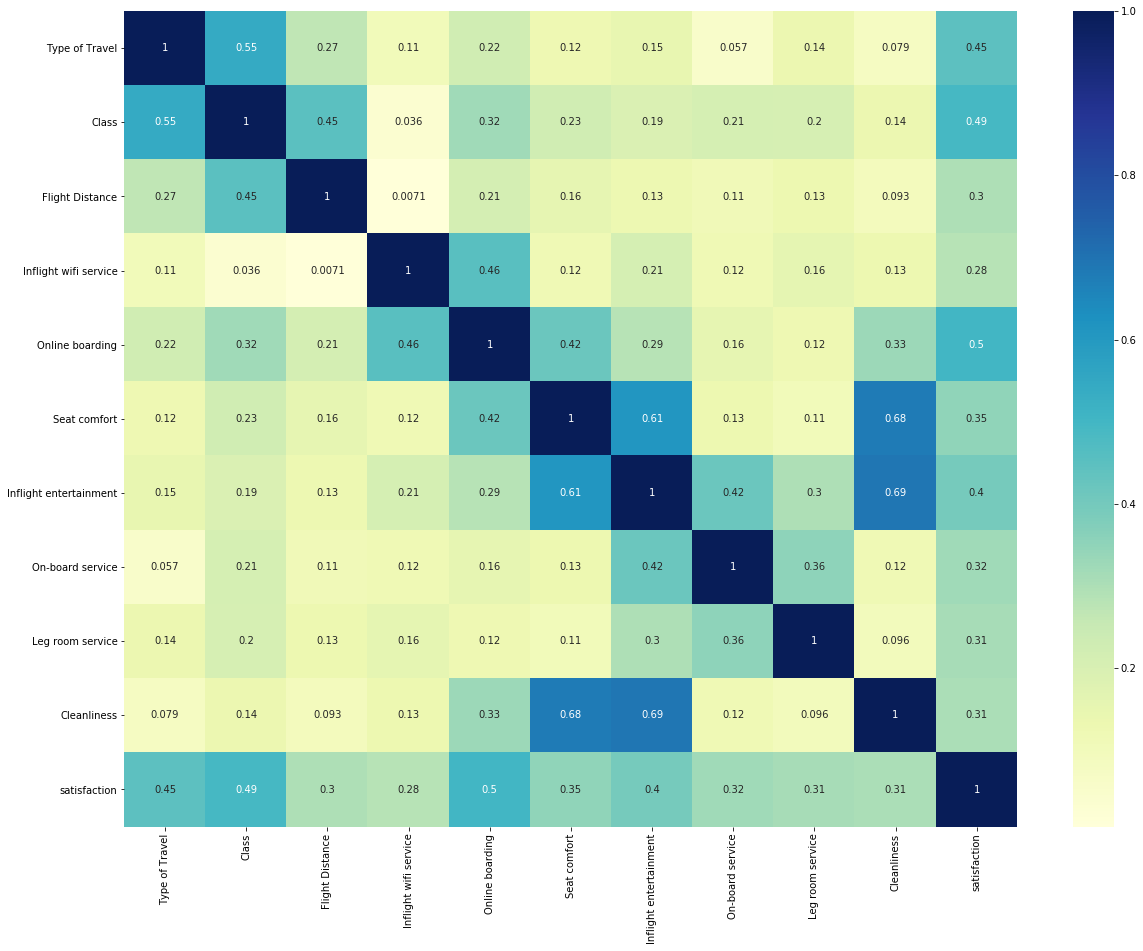

In [85]:
#new_correlation matrix with out variables with low correlations
df_new=df.drop(['Gender','Age','Departure/Arrival time convenient','Departure Delay in Minutes','Arrival Delay in Minutes','Gate location','Customer Type','Ease of Online booking','Food and drink','Baggage handling','Checkin service','Inflight service'], axis=1)
plt.figure(figsize=(20,15))
sn.heatmap(df_new.corr(),annot = True,cmap='YlGnBu')

In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Type of Travel          103904 non-null  int64
 1   Class                   103904 non-null  int64
 2   Flight Distance         103904 non-null  int64
 3   Inflight wifi service   103904 non-null  int64
 4   Online boarding         103904 non-null  int64
 5   Seat comfort            103904 non-null  int64
 6   Inflight entertainment  103904 non-null  int64
 7   On-board service        103904 non-null  int64
 8   Leg room service        103904 non-null  int64
 9   Cleanliness             103904 non-null  int64
 10  satisfaction            103904 non-null  int64
dtypes: int64(11)
memory usage: 8.7 MB


In [87]:
X_test_modified=X_test.drop(['Gender','Age','Departure/Arrival time convenient','Departure Delay in Minutes','Arrival Delay in Minutes','Gate location','Customer Type','Ease of Online booking','Food and drink','Baggage handling','Checkin service','Inflight service'], axis=1)

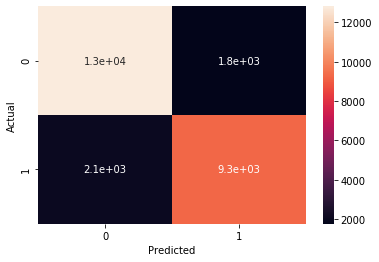

In [88]:
#Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression Classifier
logistic_regression= LogisticRegression(max_iter=10000) #normal max_iter of 1000 exceeds limit

#Train the model using the training sets
logistic_regression.fit(X_train_modified,y_train)

#Predict the response for test dataset
y_pred_logistic=logistic_regression.predict(X_test_modified)

#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred_logistic, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [89]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_logistic))

Accuracy:  0.8518632583923622


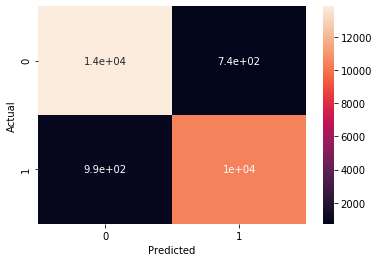

In [90]:
#Create a Randon Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)
#Train the model using the training sets
clf.fit(X_train_modified,y_train)
#Predict the response for test dataset
y_pred_rfc=clf.predict(X_test_modified)

#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred_rfc, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [91]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_rfc))
plt.show()

Accuracy:  0.9334770557437635


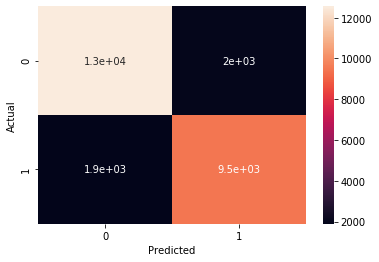

In [92]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_modified, y_train)

#Predict the response for test dataset
y_pred_gnb = gnb.predict(X_test_modified)

#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred_gnb, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [93]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_gnb))
plt.show()

Accuracy:  0.8493609485679089


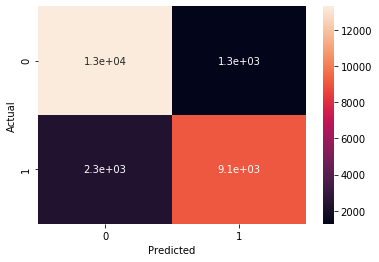

In [94]:
#Create a K Neighbors Classifier
classifier = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
classifier.fit(X_train_modified, y_train)

#Predict the response for test dataset
y_pred_knc = classifier.predict(X_test_modified)

#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred_knc, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [95]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_knc))
plt.show()

Accuracy:  0.8616415152448413


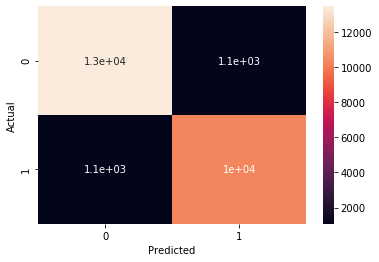

In [96]:
#Create a Decision Tree Classifier
dtc=DecisionTreeClassifier(random_state=1)

#Train the model using the training sets
dtc.fit(X_train_modified, y_train)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test_modified)

confusion_matrix = pd.crosstab(y_test, y_pred_dtc, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [97]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_dtc))
plt.show()

Accuracy:  0.9165383430859255
